In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import classifiers

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

KeyboardInterrupt: 

# Prepairing dataset

In [ ]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split( X, y, test_size=0.1, train_size=0.01)
x_train, x_test, y_train, y_test = train_test_split( X_TEST, Y_TEST, test_size=0.15)
x_train_crossval, y_train_crossval = X_TRAIN, Y_TRAIN

print('CrossValidation size = ', x_train_crossval.shape[0])

print('Train set size = ', x_train.shape[0])
print('Test set size = ', x_test.shape[0])

CrossValidation size =  700
Train set size =  11900
Test set size =  2100


In [ ]:
def drawSupportVectors(model, num_samples=5, imSize=28):
    examples = np.zeros((num_samples * 10, imSize*imSize))
    for i in range(10):
        examples[i*num_samples:i*num_samples+num_samples] = model.support_vectors_[ np.sum(model.n_support_[:i]) : np.sum(model.n_support_[:i]) + num_samples ]

    fig, axes = plt.subplots(10, num_samples, figsize=(5, 12), constrained_layout=True)
    for ax, img in zip(axes.flat, examples):
        ax.imshow(img.reshape(imSize, imSize))
    
    plt.show()

def drawDistribution(x, y, num_features=4):
    size = num_features
    plt.figure(figsize=(18, 18), dpi=100)
    for x_ in range(size):
        for y_ in range(size):
            plt.subplot(size, size, 1 + x_*size + y_)
            if (x_ != y_):
                plt.scatter(x[:, x_], x[:, y_], c= list(map(int, y)), s=20, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 20))

In [ ]:
svm_model = None

def Test(dataset):
    global svm_model
    print('\nLogisticRegression processing...')
    classifiers.Logistic_Regression(*dataset)
    print('\nKNN processing...')
    classifiers.KNN(*dataset)
    print('\nDesicionTree processing...')
    classifiers.DesicionTree(*dataset)
    print('\nSVM processing...')
    svm_model = classifiers.SVM(*dataset)

# HyperParameters


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8314285714285715
Accuracy:  0.91

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 1 - > Accuracy = 0.8371428571428572
Accuracy:  0.95

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 10 - > Accuracy = 0.6399999999999999
Accuracy:  0.8247619047619048

SVM processing...
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.8885714285714286
Accuracy:  0.9695238095238096
SVM supprt vectors:


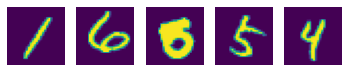

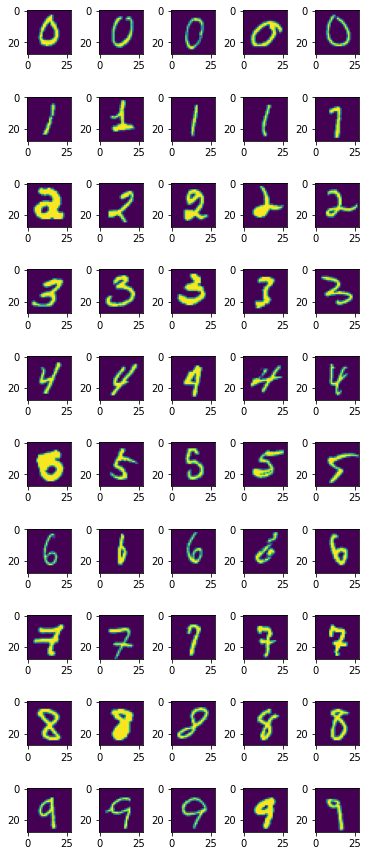

In [ ]:
dataset = [x_train_crossval, y_train_crossval, x_train, y_train, x_test, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train[i], (28,28)))

Test(dataset)

print("SVM supprt vectors:")
drawSupportVectors(svm_model, 5, 28)

# Standart scaller


LogisticRegression:
Best model params: 
Penalty: l2 | Tol: 0.01 | Solver: saga - > Accuracy = 0.8977142857142858
Accuracy:  0.9124867724867725

KNN:
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 3 - > Accuracy = 0.9194285714285714
Accuracy:  0.9598941798941799

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 11 - > Accuracy = 0.7885714285714286
Accuracy:  0.8794708994708995

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.01 - > Accuracy = 0.9317142857142857
Accuracy:  0.968994708994709


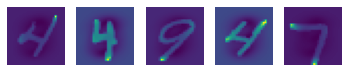

In [ ]:
scaler = StandardScaler()
x_train_s_stsc = scaler.fit_transform(x_train_crossval, y_train_crossval)
x_train_stsc = scaler.fit_transform(x_train, y_train)
x_test_stsc = scaler.transform(x_test)
dataset = [x_train_s_stsc, y_train_crossval, x_train_stsc, y_train, x_test_stsc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_stsc[i], (28,28)))

Test(dataset)
#105m

# MinMax scaler


LogisticRegression:
Best model params: 
Penalty: l2 | Tol: 0.1 | Solver: saga - > Accuracy = 0.9042857142857142
Accuracy:  0.9232804232804233

KNN:
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 1 - > Accuracy = 0.9365714285714286
Accuracy:  0.9705820105820105

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 17 - > Accuracy = 0.7881428571428573
Accuracy:  0.882962962962963

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.959
Accuracy:  0.9811640211640211


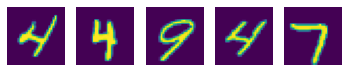

In [ ]:
scaler = MinMaxScaler()
x_train_s_stmm = scaler.fit_transform(x_train_crossval, y_train_crossval)
x_train_stmm = scaler.fit_transform(x_train, y_train)
x_test_stmm = scaler.transform(x_test)
dataset = [x_train_s_stmm, y_train_crossval, x_train_stmm, y_train, x_test_stmm, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_stmm[i], (28,28)))

Test(dataset)
#121m

# PCA


LogisticRegression processing...
Best model params: 
Penalty: l1 | Tol: 0.1 | Solver: saga - > Accuracy = 0.8128571428571428
Accuracy:  0.8942857142857142

KNN processing...
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 1 - > Accuracy = 0.8485714285714285
Accuracy:  0.960952380952381

DesicionTree processing...
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 10 - > Accuracy = 0.6428571428571429
Accuracy:  0.789047619047619

SVM processing...
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.8985714285714286
Accuracy:  0.9761904761904762
SVM supprt vectors:


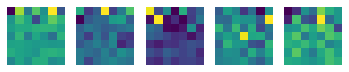

In [ ]:
pca = PCA(n_components = 49)
x_train_s_pc = pca.fit_transform(x_train_crossval, y_train_crossval)
x_train_pc = pca.fit_transform(x_train, y_train)
x_test_pc = pca.transform(x_test)
dataset = [x_train_s_pc, y_train_crossval, x_train_pc, y_train, x_test_pc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc[i], (7,7)))

Test(dataset)

print("SVM supprt vectors:")
drawSupportVectors(svm_model, 5, 7)
drawDistribution(x_test_pc, y_test, 4)
#18m

# PCA+MinMax


LogisticRegression:
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.8917142857142858
Accuracy:  0.9043386243386243

KNN:
Best model params: 
Algorithm: ball_tree | P: 2 | N_neighbors: 1 - > Accuracy = 0.9311428571428572
Accuracy:  0.9685714285714285

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 13 - > Accuracy = 0.7714285714285714
Accuracy:  0.8473015873015873

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.001 - > Accuracy = 0.9607142857142857
Accuracy:  0.9827513227513227


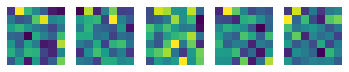

In [ ]:
pca = PCA(n_components = 49)
scaler = MinMaxScaler()
x_train_s_pc_scmm = scaler.fit_transform(pca.fit_transform(x_train_crossval, y_train_crossval))
x_train_pc_scmm = scaler.fit_transform(pca.fit_transform(x_train, y_train))
x_test_pc_scmm = scaler.transform(pca.transform(x_test))
dataset = [x_train_s_pc_scmm, y_train_crossval, x_train_pc_scmm, y_train, x_test_pc_scmm, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc_scmm[i], (7,7)))

Test(dataset)
#13m

# PCA+StandartScater


LogisticRegression:
Best model params: 
Penalty: l1 | Tol: 0.01 | Solver: saga - > Accuracy = 0.8975714285714287
Accuracy:  0.9064550264550264

KNN:
Best model params: 
Algorithm: ball_tree | P: 1 | N_neighbors: 5 - > Accuracy = 0.9231428571428572
Accuracy:  0.9674074074074074

DesicionTree:
Best model params: 
Criterion: entropy | Splitter: best | Max_depth: 16 - > Accuracy = 0.771
Accuracy:  0.8487830687830688

SVM:
Best model params: 
C: 5 | Kernel: rbf | Tol: 0.01 - > Accuracy = 0.9597142857142856
Accuracy:  0.9829629629629629


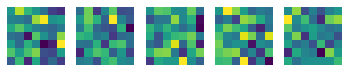

In [ ]:
pca = PCA(n_components = 49)
scaler = StandardScaler()
x_train_s_pc_stsc = scaler.fit_transform(pca.fit_transform(x_train_crossval, y_train_crossval))
x_train_pc_stsc = scaler.fit_transform(pca.fit_transform(x_train, y_train))
x_test_pc_stsc = scaler.transform(pca.transform(x_test))
dataset = [x_train_s_pc_stsc, y_train_crossval, x_train_pc_stsc, y_train, x_test_pc_stsc, y_test]

for i in range(5):
    plt.subplot(1,5,i+1)  
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc_stsc[i], (7,7)))

Test(dataset)